In [16]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.nn.functional import one_hot
import matplotlib.pyplot as plt
import numpy as np

### Load Sudoku dataset

In [19]:
images = np.load('/content/drive/MyDrive/Sudoko Dataset Task 1/train/imgs.npy') # npote: images1
labels = np.load('/content/drive/MyDrive/Sudoko Dataset Task 1/train/known_values_labels.npy')

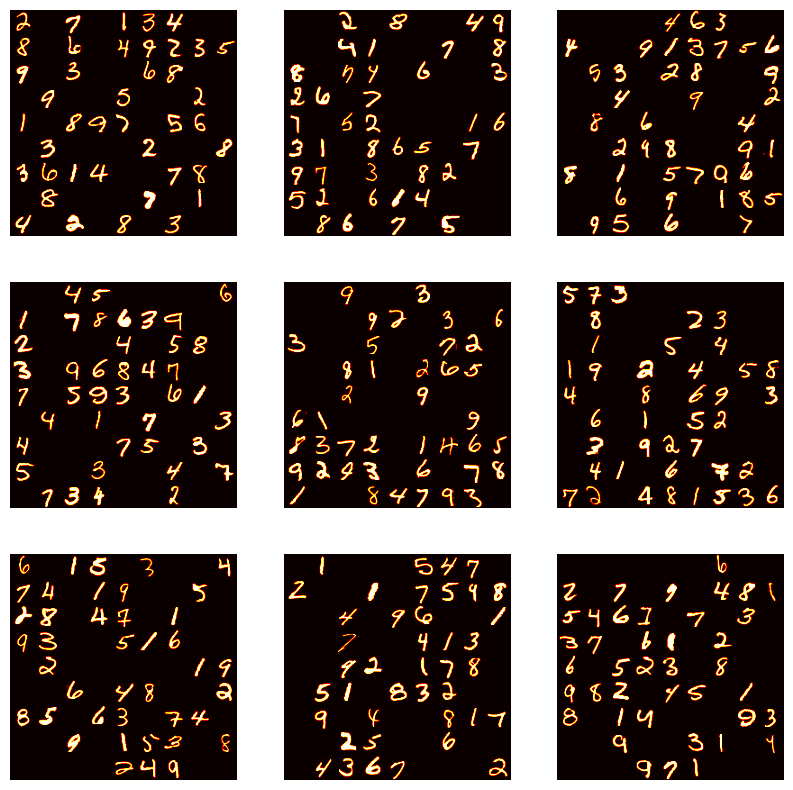

In [20]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='hot')
    plt.axis('off')

plt.show()

### Load MNIST dataset
     

In [3]:
Transform = transforms.ToTensor()

train = datasets.MNIST(root='../DATA', train=True, download=True, transform=Transform)
train.data[train.targets==0]=0

test = datasets.MNIST(root='../DATA', train=False, download=False, transform=Transform)
test.data[test.targets==0]=0

100%|██████████| 9912422/9912422 [00:00<00:00, 299536824.53it/s]

Extracting ../DATA/MNIST/raw/train-images-idx3-ubyte.gz to ../DATA/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30178299.41it/s]


Extracting ../DATA/MNIST/raw/train-labels-idx1-ubyte.gz to ../DATA/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 149087940.77it/s]

Extracting ../DATA/MNIST/raw/t10k-images-idx3-ubyte.gz to ../DATA/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13350055.20it/s]

Extracting ../DATA/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../DATA/MNIST/raw



In [4]:
train_loader = DataLoader(train, batch_size=64, shuffle=True)

test_loader = DataLoader(test, batch_size=64, shuffle=False)

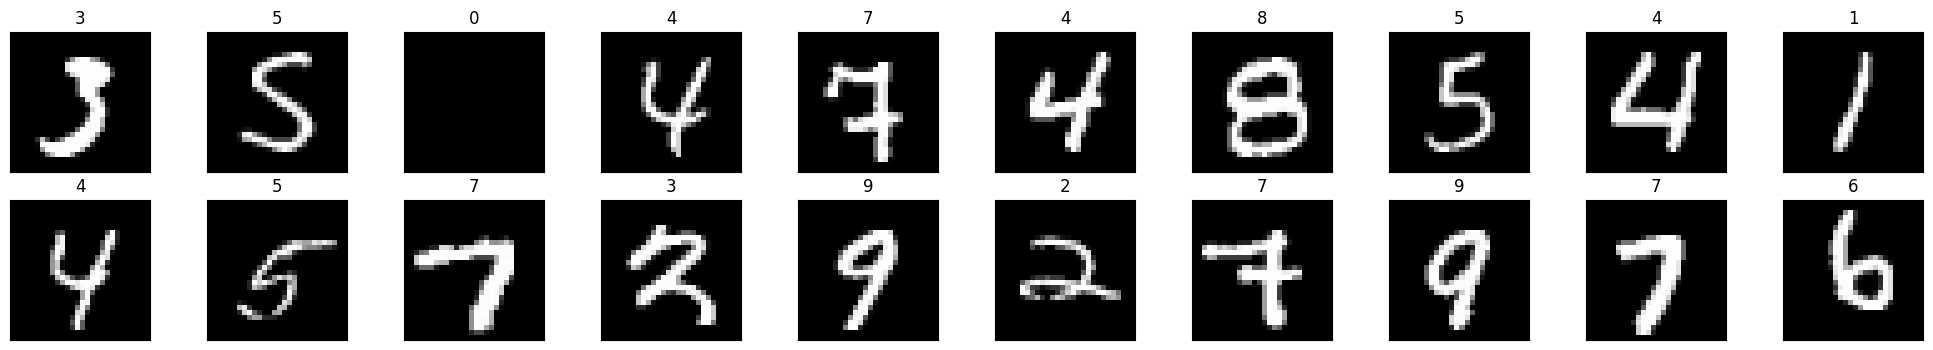

In [25]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    ax.set_title(str(labels[idx].item()))

### MLP Model

In [8]:
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        # For the first layer, the input is the 784 pixels of the 28x28 image, and output is the data from 10 neurons as there are 10 classes
        self.linear1 = nn.Linear(28*28, 512)
        self.linear2 = nn.Linear(512,128)
        self.linear3 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))  # Use ReLU activation after the first linear layer
        x = F.relu(self.linear2(x))  # Use ReLU activation after the second linear layer
        x = self.linear3(x)    # No activation function for the last layer
        return x

In [9]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [10]:
model = NeuralNet()
model

NeuralNet(
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=10, bias=True)
)

### Training

In [11]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [12]:
epochs = 30

for epoch in range(epochs):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data.view(data.size(0),-1))  # Flatten input is needed bcz model is linear layer. Not CNN. if model is CNN do not flatten
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

Epoch 1/30, Loss: 0.6286731362342834
Epoch 2/30, Loss: 0.6078792214393616
Epoch 3/30, Loss: 0.3601768910884857
Epoch 4/30, Loss: 0.13539403676986694
Epoch 5/30, Loss: 0.1992589235305786
Epoch 6/30, Loss: 0.5313777327537537
Epoch 7/30, Loss: 0.16986070573329926
Epoch 8/30, Loss: 0.11103341728448868
Epoch 9/30, Loss: 0.48878514766693115
Epoch 10/30, Loss: 0.09501839429140091
Epoch 11/30, Loss: 0.25562554597854614
Epoch 12/30, Loss: 0.26962584257125854
Epoch 13/30, Loss: 0.03720683977007866
Epoch 14/30, Loss: 0.16726712882518768
Epoch 15/30, Loss: 0.11885222047567368
Epoch 16/30, Loss: 0.09772556275129318
Epoch 17/30, Loss: 0.07198286801576614
Epoch 18/30, Loss: 0.01393480971455574
Epoch 19/30, Loss: 0.14777487516403198
Epoch 20/30, Loss: 0.06819100677967072
Epoch 21/30, Loss: 0.09650424867868423
Epoch 22/30, Loss: 0.22686536610126495
Epoch 23/30, Loss: 0.03743698075413704
Epoch 24/30, Loss: 0.02436171844601631
Epoch 25/30, Loss: 0.1611528843641281
Epoch 26/30, Loss: 0.07633263617753983
E

### Testing

In [17]:
def test():
    # Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            test_output = model(images.view(images.size(0),-1))
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))

    print('Test Accuracy: %.2f' % accuracy)


test()

Test Accuracy: 1.00


In [ ]:
torch.save(model, 'model.pt')

In [15]:
images1 = np.load('/content/drive/MyDrive/Sudoko Dataset Task 1/test/imgs.npy') # npote: images1


In [14]:
import numpy as np
import matplotlib.pyplot as plt

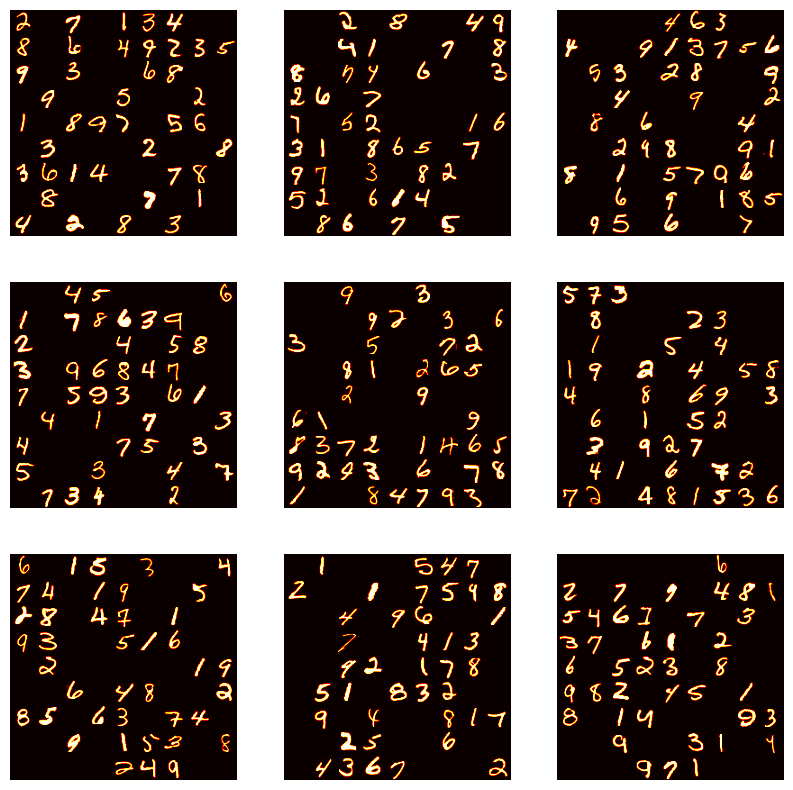

In [18]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images1[i], cmap='hot')
    plt.axis('off')

plt.show()

### Predictions for Kaggle

In [26]:
all_output = np.zeros((10000, 9, 9))
all_ids = []

for n in range(10000):
  for i in range(9):
    for j in range(9):
      small_grid_image = images1[n, i * 28 : (i + 1) * 28 , j * 28 : (j + 1) * 28]
      input = torch.tensor(small_grid_image).float().reshape((1, 28*28)) # shape = batch_size, number of neurons in first layer of linear model.
      output = model(input)
      id = f'{n}_{i}{j}'
      all_output[n, i, j] = torch.argmax(output[0])
      all_ids.append(id)

In [27]:
all_output = all_output.reshape((810000))

In [28]:
import pandas as pd

cs = {'id':all_ids,'value':all_output}
csv = pd.DataFrame(cs)

In [29]:
csv.head(10)

,id,value
0,0_00,2.0
1,0_01,0.0
2,0_02,7.0
3,0_03,0.0
4,0_04,1.0
5,0_05,3.0
6,0_06,4.0
7,0_07,0.0
8,0_08,0.0
9,0_10,8.0


In [30]:
csv.to_csv('submission.csv',index=False)